## HW4, Ghazaleh Zehtab
# Q2

In [386]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plot_utils
import seaborn as sns
import statistics
from sklearn import tree, metrics, preprocessing
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz

## Q2.a

In [387]:
df= pd.read_csv('Diabetes.csv')
df

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
762,10,101,76,48,180,32.9,0.171,63,0
763,2,122,70,27,0,36.8,0.340,27,0
764,5,121,72,23,112,26.2,0.245,30,0
765,1,126,60,0,0,30.1,0.349,47,1


In [388]:
df.columns=['number of times pregnant','Glucose','Diastolic Blood Pressure','Skinfold Thickness','2-Hour serum insulin','BMI','Diabetes Pedigree Function','Age','Class']
df.head(30)

,number of times pregnant,Glucose,Diastolic Blood Pressure,Skinfold Thickness,2-Hour serum insulin,BMI,Diabetes Pedigree Function,Age,Class
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0
5,3,78,50,32,88,31.0,0.248,26,1
6,10,115,0,0,0,35.3,0.134,29,0
7,2,197,70,45,543,30.5,0.158,53,1
8,8,125,96,0,0,0.0,0.232,54,1
9,4,110,92,0,0,37.6,0.191,30,0


## Q2.b

In [389]:
df=df.replace('MISS',np.nan)
df=df.replace('missing',np.nan)
df=df.replace('NULL',np.nan)
df=df.replace("''",np.nan)
df=df.replace("?",np.nan)
df.isna().sum()

number of times pregnant      0
Glucose                       0
Diastolic Blood Pressure      0
Skinfold Thickness            0
2-Hour serum insulin          0
BMI                           0
Diabetes Pedigree Function    0
Age                           0
Class                         0
dtype: int64

array([[<AxesSubplot:title={'center':'number of times pregnant'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'Diastolic Blood Pressure'}>],
       [<AxesSubplot:title={'center':'Skinfold Thickness'}>,
        <AxesSubplot:title={'center':'2-Hour serum insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'Diabetes Pedigree Function'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Class'}>]], dtype=object)

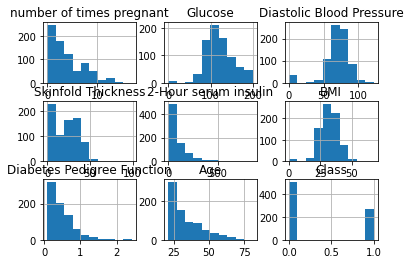

In [390]:
df.hist()

In [391]:
x = df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
min_max_scaler_df = pd.DataFrame(x_scaled,index=df.index, columns=df.columns)

array([[<AxesSubplot:title={'center':'number of times pregnant'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'Diastolic Blood Pressure'}>],
       [<AxesSubplot:title={'center':'Skinfold Thickness'}>,
        <AxesSubplot:title={'center':'2-Hour serum insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'Diabetes Pedigree Function'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Class'}>]], dtype=object)

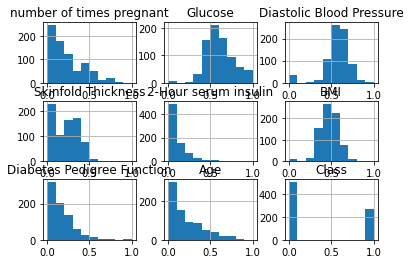

In [392]:
min_max_scaler_df.hist()

In [393]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
scaler_df_trans = pd.DataFrame(imputer.fit_transform(min_max_scaler_df))
scaler_df_trans.columns = min_max_scaler_df.columns
scaler_df_trans.index = min_max_scaler_df.index
scaler_df_trans.head(20)

,number of times pregnant,Glucose,Diastolic Blood Pressure,Skinfold Thickness,2-Hour serum insulin,BMI,Diabetes Pedigree Function,Age,Class
0,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0.0
1,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1.0
2,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0.0
3,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1.0
4,0.294118,0.582915,0.606557,0.000000,0.000000,0.381520,0.052519,0.150000,0.0
5,0.176471,0.391960,0.409836,0.323232,0.104019,0.461997,0.072588,0.083333,1.0
6,0.588235,0.577889,0.000000,0.000000,0.000000,0.526080,0.023911,0.133333,0.0
7,0.117647,0.989950,0.573770,0.454545,0.641844,0.454545,0.034159,0.533333,1.0
8,0.470588,0.628141,0.786885,0.000000,0.000000,0.000000,0.065756,0.550000,1.0
9,0.235294,0.552764,0.754098,0.000000,0.000000,0.560358,0.048249,0.150000,0.0


## Q2.c

In [394]:
x = scaler_df_trans.iloc[:,:-1]
y = scaler_df_trans.iloc[:,-1]
#y=y.astype(int)

In [395]:
y.head()

0    0.0
1    1.0
2    0.0
3    1.0
4    0.0
Name: Class, dtype: float64

## Q2.d

<AxesSubplot:ylabel='Frequency'>

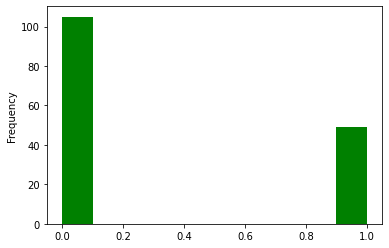

In [396]:

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)
y_test.plot.hist(color='g')

<AxesSubplot:ylabel='Frequency'>

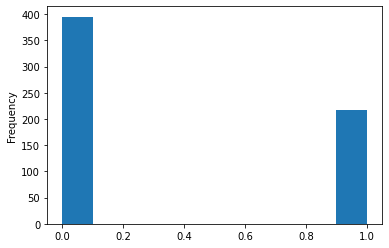

In [397]:
y_train.plot.hist()

## Q2.e

In [398]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100,max_depth=3,
                               criterion="entropy", random_state=0).fit(x_train,y_train)

## Q2.f

In [399]:
y_pred = model.predict(x_test)
metrics.accuracy_score(y_test, y_pred)

0.7662337662337663

## Q2.g

In [400]:
accuracy_list = []
for i in range(1,10):
    DT = RandomForestClassifier(n_estimators=100,max_depth=i,
                               criterion="entropy", random_state=0).fit(x_train,y_train)
    y_pred = DT.predict(x_test)
    accuracy_list.append(accuracy_score(y_test,y_pred)*100)

accuracy_list

[70.12987012987013,
 74.67532467532467,
 76.62337662337663,
 78.57142857142857,
 76.62337662337663,
 78.57142857142857,
 79.87012987012987,
 79.22077922077922,
 77.92207792207793]

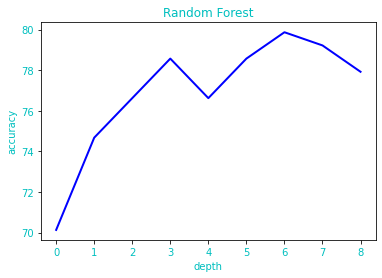

In [401]:
plt.figure()
plt.plot(accuracy_list, color="b", linewidth=2)
plt.xlabel("depth",c="c")
plt.ylabel("accuracy",c="c")
plt.yticks(c= 'c')
plt.xticks(c= 'c')
plt.title("Random Forest",c="c")
plt.show()